## Importation des librairies nécessaires à l'importation des fonctions

In [1]:
import sys
import os

# Importation des fonctions

Implémentation des fonctions de features

In [2]:
# Répertoire parent du notebook
mlops_path = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Ajout du chemin
features_domain_path = os.path.join(mlops_path, 'features', 'domain')
sys.path.append(features_domain_path)

# Importation des fonctions de puis le chemin précédemment définit
from features import *

Implémentation fonction d'importation de la base de données brute

In [3]:
# Ajout du chemin
features_infrastructure_path = os.path.join(mlops_path, 'features', 'infrastructure')
sys.path.append(features_infrastructure_path)

# Importation des fonctions de puis le chemin précédemment définit
from importation import *

Implémentation des fonctions liées à la modélisation

In [4]:
# Ajout du chemin
features_models_path = os.path.join(mlops_path, 'models')
sys.path.append(features_models_path)

# Importation des fonctions de puis le chemin précédemment définit
from model import *

# Appel de toutes les fonctions features :

Importation de la base, traitement des données manquantes, regroupement des variables, traitement de la variable capital (fusion de capital_loss et capital_gain + centré réduit), suppression des colonnes inutiles

In [5]:
df=importation()
df=traiter_donnees_manquantes(df)
df=regroupement(df)
df=traitement_capital(df)
df=supprimer_colonnes(df)

df.head()

,gender,income,Age,Heures_semaine,Marital_status,Education,Occupation,Relationship,capital
0,Male,<=50K,<=28 ans,<=40H,Jamais_marie,Lycee,Artisan_Reparation,Autre,-0.191029
1,Male,<=50K,29_39 ans,>46H,Marie,Lycee,Artisan_Reparation,Conjoint,-0.191029
2,Male,>50K,<=28 ans,<=40H,Marie,Sup,Armee_defense,Conjoint,-0.191029
3,Male,>50K,40_49 ans,<=40H,Marie,Sup,Artisan_Reparation,Conjoint,2.779084
4,Female,<=50K,<=28 ans,<=40H,Jamais_marie,Sup,Autre,Autre,-0.191029


# Entrainement des modèles

Entraînement des 7 modèles testés, GridSearchCV est utilisé uniquement pour l'arbre de décision, le temps d'éxécution est approximativement d'une minute

In [6]:
tree=fit_tree(df)
forest=fit_forest(df)
ada=fit_ada(df)
knn=fit_knn(df)
svc=fit_svc(df)
log=fit_log(df)
mlp=fit_mlp(df)

DecisionTreeClassifier a été entrainé
RandomForestClassifier a été entrainé
AdaBoostClassifier a été entrainé
KNeighborsClassifier a été entrainé
SVC a été entrainé
LogisticRegression a été entrainé
MLPClassifier a été entrainé


# Score des modèles

La fonction model_score, donne plusieurs métriques de score pour chaque modèle passé en paramètre

In [7]:
model_score(tree,df)

Accuracy apprentissage:  0.8420489464442493
Accuracy test:  0.8502880658436214
Precision: 0.7660878447395302
Recall: 0.5242922055225445
F1: 0.6225357958082589
AUC: 0.7374932876035588


La fonction matrice_confusion affiche la matrice de confusion pour chaque modèle passé en paramètre

Arbre <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x00000243014528F0>


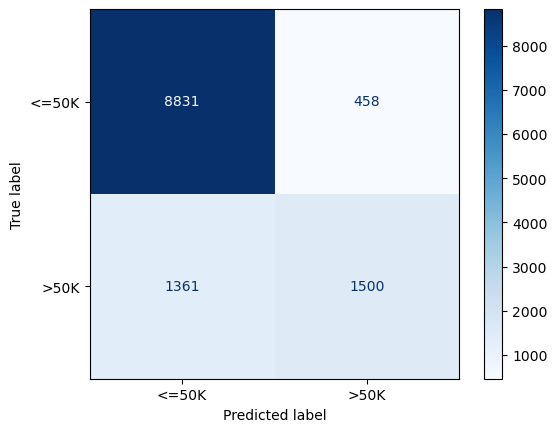

In [9]:
matrice_confusion(tree,df)

La fonction courbe_roc affiche la courbe de ROC pour chaque modèle passé en paramètre

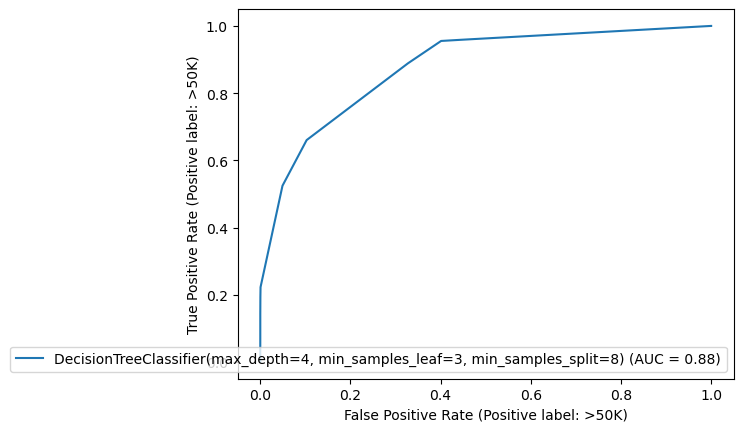

In [11]:
courbe_roc(tree, df)

La fonction features_importances affiche l'importance de chaque modalité dans la construction du modèle RandomForest uniquement

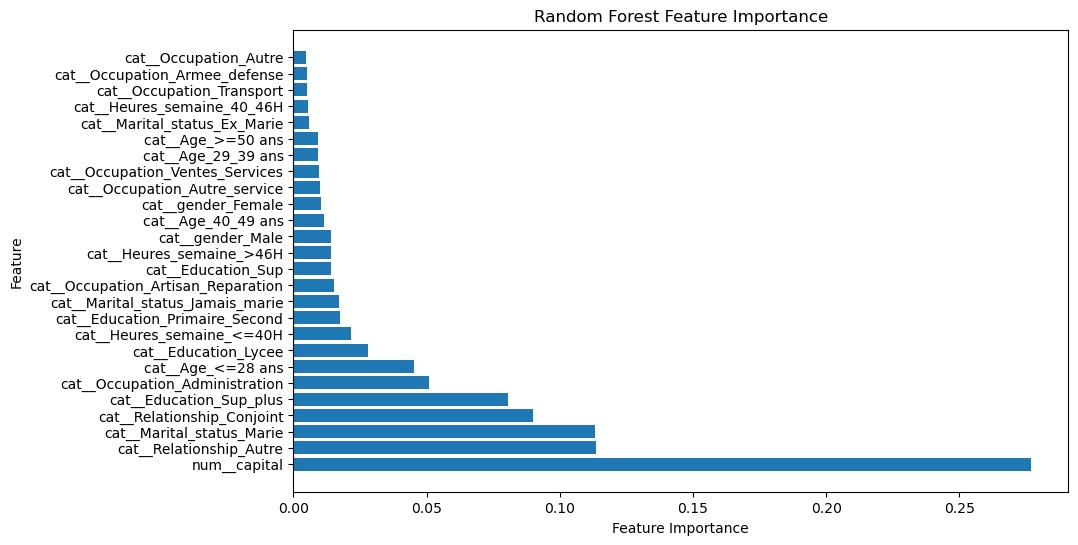

In [12]:
features_importances(forest, df)